#Separacion de audios


In [ ]:
%%capture
!git clone https://github.com/speechbrain/speechbrain/
!pip install speechbrain
!pip install transformers

In [ ]:
import speechbrain as sb
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio
import soundfile as sf

In [ ]:
from IPython.display import Audio
from IPython.core.display import display

In [ ]:
from speechbrain.pretrained import SepformerSeparation as separator

model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')
est_sources = model.separate_file(path='speechbrain/sepformer-wsj02mix/test_mixture.wav')

hyperparams.yaml:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

decoder.ckpt:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

test_mixture.wav:   0%|          | 0.00/66.2k [00:00<?, ?B/s]

In [ ]:
import math
import os

In [ ]:
def escalar_audio(audio1_path, audio2_path, overlap_percentage = 0, volume_ratio = 0):
    # Cargar los archivos de audio
    audio1, sr = librosa.load(audio1_path, sr=None)
    audio2, sr = librosa.load(audio2_path, sr=None)

    # Obtener la duración de cada audio
    duration1 = len(audio1) / sr
    duration2 = len(audio2) / sr

    # Determinar el audio más largo y el más corto
    if duration1 >= duration2:
        long_audio = audio1
        short_audio = audio2
    else:
        long_audio = audio2
        short_audio = audio1

    # Asegurarse de que el audio más corto tenga la misma duración que el más largo
    long_audio = long_audio[:len(short_audio)]

    audio1 = short_audio
    audio2 = long_audio

    # Ajustar el volumen del segundo audio según la razón en dB
    rms_audio1 = librosa.feature.rms(y = audio1).mean()
    rms_audio2 = librosa.feature.rms(y = audio2).mean()

    # Calcular el valor RMS de cada audio
    dB_rms_audio1 = 10*math.log(rms_audio1)
    dB_rms_audio2 = 10*math.log(rms_audio2)

    # Calcular la relación de amplitud entre los audios
    relacion_amplitud = volume_ratio - (dB_rms_audio1 - dB_rms_audio2)
    relacion_amplitud += rms_audio1

    # Ajustar el volumen del audio2 utilizando el factor de ajuste
    factor_ajuste = math.pow(10, relacion_amplitud / 10)
    audio1_ajustado = audio1 * factor_ajuste


    # Calcular la duración de la superposición
    overlap_samples = int(len(audio1_ajustado) * overlap_percentage)

    audio1_padded = np.pad(audio1_ajustado, (overlap_samples, 0), mode='constant')


    # Obtener la duración de cada audio
    duration1 = len(audio1_padded) / sr
    duration2 = len(audio2) / sr

    # Determinar el audio más largo y el más corto
    if duration1 >= duration2:
        long_audio = audio1_padded
        short_audio = audio2
    else:
        long_audio = audio2
        short_audio = audio1_padded

    # Asegurarse de que el audio más corto tenga la misma duración que el más largo
    short_audio = np.pad(short_audio, (0, len(long_audio) - len(short_audio)))


    # Combinar los audios
    merged_audio = long_audio + short_audio

    # Normalizar el audio
    merged_audio = librosa.util.normalize(merged_audio)

    return long_audio, short_audio, merged_audio

In [ ]:
audio1, sr1 = librosa.load(est_sources, sr=None)
display(Audio(audio1, rate=sr1))
librosa.display.waveshow(audio1, sr=sr1)

In [ ]:
!pip install pydub

Volumen actual: -11.659523405651292 dBFS


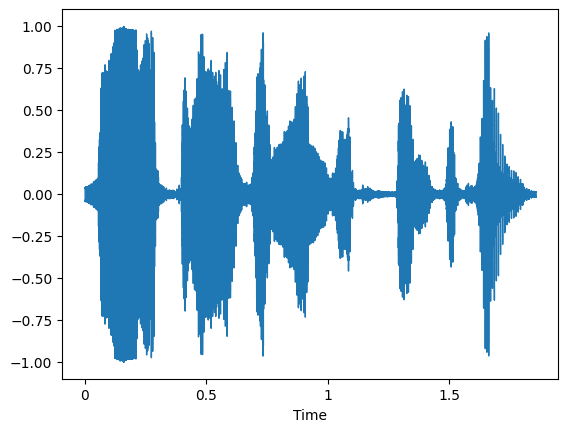

In [ ]:
from pydub import AudioSegment

def calculate_volume(audio_path):
    audio = AudioSegment.from_file(audio_path)
    return audio.dBFS

def scale_audio(audio_path, target_dBFS):
    audio = AudioSegment.from_file(audio_path)
    current_dBFS = audio.dBFS
    diff_dBFS = target_dBFS - current_dBFS
    scaled_audio = audio + diff_dBFS
    return scaled_audio

# Ejemplo de uso
audio_path = SAVEE + '/' + savee_dir_list[5]

# Calcular el volumen
volume = calculate_volume(audio_path)
print("Volumen actual:", volume, "dBFS")

audio, _ = librosa.load(audio_path, sr=None)
librosa.display.waveshow(audio, sr=8000)

Volumen actual: -11.659523405651292 dBFS


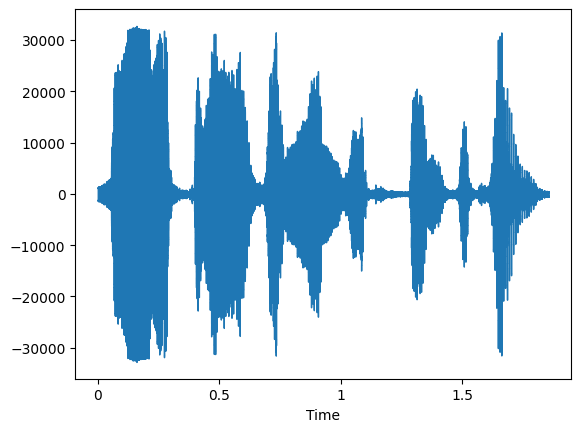

In [ ]:
volume = calculate_volume(audio_path)
print("Volumen actual:", volume, "dBFS")

db = 0

audio = AudioSegment.from_file(audio_path)
sonido = np.array(audio.get_array_of_samples()).astype(np.float32)
librosa.display.waveshow(sonido, sr=8000)

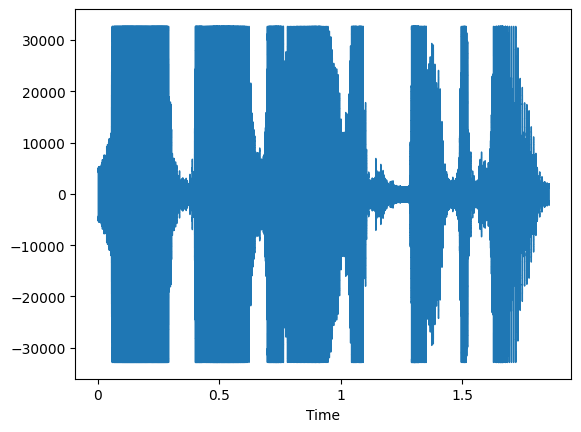

In [ ]:
change_dBFS = db - volume
audio = audio.apply_gain(change_dBFS)
librosa.display.waveshow(np.array(audio.get_array_of_samples()).astype(np.float32), sr=8000)

Audio escalado guardado como audio_escalado.wav


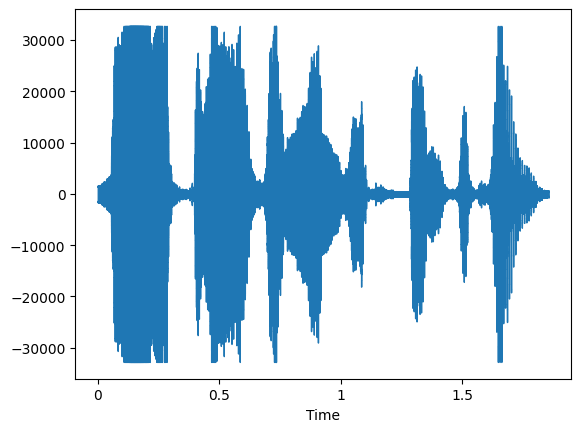

In [ ]:
# Escalar el volumen a -10 dBFS
target_dBFS = -10
scaled_audio = scale_audio(audio_path, target_dBFS)
print(scaled_audio)
scaled_audio = np.array(scaled_audio.get_array_of_samples()).astype(np.float32)
librosa.display.waveshow(scaled_audio, sr=8000)
print("Audio escalado guardado como audio_escalado.wav")

In [ ]:
sf.write('person_one.wav', est_sources[:, :, 0].detach().cpu().squeeze(), sr1)
sf.write('person_two.wav', est_sources[:, :, 1].detach().cpu().squeeze(), sr1)

In [ ]:
RAVDESS = "/content/drive/MyDrive/Tesis/RCST_8k/Ravdess"
CREMA = "/content/drive/MyDrive/Tesis/RCST_8k/CremaD"
TESS = "/content/drive/MyDrive/Tesis/RCST_8k/TESS"
SAVEE = "/content/drive/MyDrive/Tesis/RCST_8k/Surrey"

In [ ]:
savee_dir_list = os.listdir(SAVEE)
savee_dir_list = [file for file in savee_dir_list if file.endswith('.wav')]
print(savee_dir_list[5])

DC_a04.wav


Volumen actual: -15.056927707858287 dBFS
Volumen actual: -11.659523405651292 dBFS


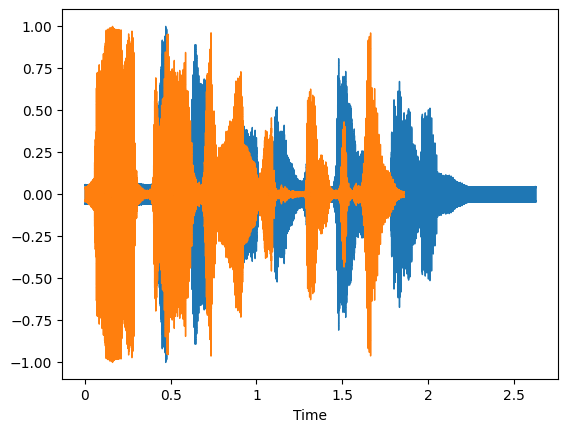

In [ ]:
audio_path1 = SAVEE + '/' + savee_dir_list[5]
audio_path2 = SAVEE + '/' + savee_dir_list[10]

audio2, sr2 = librosa.load(audio_path2, sr=None)
librosa.display.waveshow(audio2, sr=8000)
volume2 = calculate_volume(audio_path2)
print("Volumen actual:", volume2, "dBFS")

audio3, sr3 = librosa.load(audio_path1, sr=None)
librosa.display.waveshow(audio3, sr=8000)
volume1 = calculate_volume(audio_path1)
print("Volumen actual:", volume1, "dBFS")

Volumen actual: -15.056927707858287 dBFS
Volumen actual: -11.659523405651292 dBFS


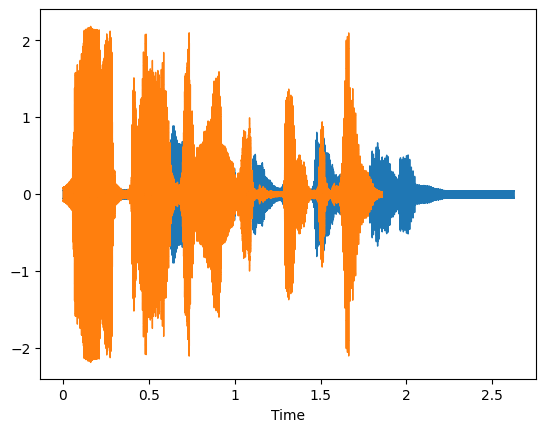

In [ ]:
volume_ratio = 0

relacion_amplitud = volume_ratio - (volume2 - volume1)
# relacion_amplitud += rms_audio1

# Ajustar el volumen del audio2 utilizando el factor de ajuste
factor_ajuste = math.pow(10, relacion_amplitud / 10)
audio3 = audio3 * factor_ajuste

librosa.display.waveshow(audio2, sr=8000)
volume2 = calculate_volume(audio_path2)
print("Volumen actual:", volume2, "dBFS")

librosa.display.waveshow(audio3, sr=8000)
volume1 = calculate_volume(audio_path1)
print("Volumen actual:", volume1, "dBFS")

/content/drive/MyDrive/Tesis/RCST_8k/Surrey/DC_f13.wav
/content/drive/MyDrive/Tesis/RCST_8k/Surrey/DC_a04.wav


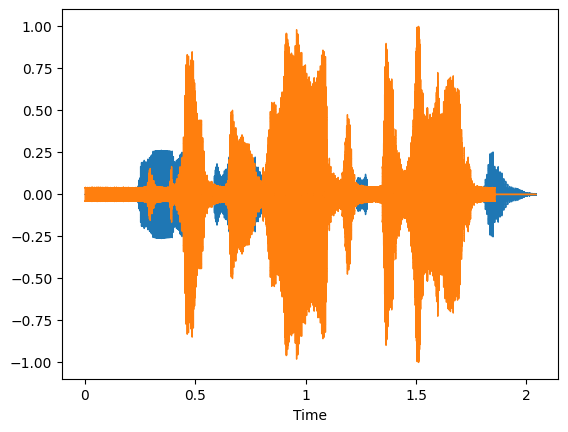

In [ ]:
audio_path1 = SAVEE + '/' + savee_dir_list[5]
audio_path2 = SAVEE + '/' + savee_dir_list[54]
print(audio_path2)
print(audio_path1)

audio1, audio2, merge = escalar_audio(audio_path1, audio_path2,0.1, -5)

librosa.display.waveshow(audio1, sr=8000)
display(Audio(audio1, rate=8000))
librosa.display.waveshow(audio2, sr=8000)
# librosa.display.waveshow(merge, sr=8000)
display(Audio(audio2, rate=8000))
display(Audio(merge, rate=8000))

/content/drive/MyDrive/Tesis/RCST_8k/Surrey/DC_f13.wav
/content/drive/MyDrive/Tesis/RCST_8k/Surrey/DC_a04.wav


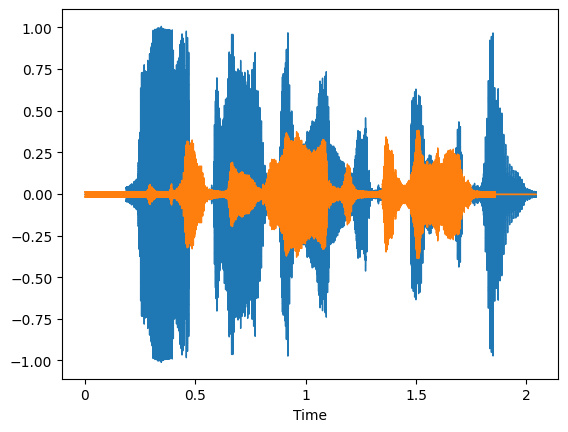

In [ ]:
audio_path1 = SAVEE + '/' + savee_dir_list[5]
audio_path2 = SAVEE + '/' + savee_dir_list[54]
print(audio_path2)
print(audio_path1)

audio1, audio2, merge = escalar_audio(audio_path1, audio_path2,0.1, 5)

librosa.display.waveshow(audio1/2.6, sr=8000)
display(Audio(audio1, rate=8000))
librosa.display.waveshow(audio2/2.6, sr=8000)
# librosa.display.waveshow(merge, sr=8000)
display(Audio(audio2, rate=8000))
display(Audio(merge, rate=8000))

# Pruebas de audio

### Librerias

In [ ]:
import os
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import save
import shutil
import math
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import random
from keras.models import model_from_json
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import Audio
from IPython.core.display import display
from scipy.io import wavfile
import matplotlib.pyplot as plt
import pprint
import statistics
import seaborn as sns
from tqdm.notebook import tqdm


In [ ]:
import subprocess

try:
        import speechmetrics as sm
except ImportError:
        print('Instalando paquetes...')
        subprocess.check_call(["python", '-m', 'pip', 'install', 'git+https://github.com/aliutkus/speechmetrics#egg=speechmetrics[cpu]'])
        import speechmetrics as sm

Instalando paquetes...


In [ ]:
%%capture
!git clone https://github.com/speechbrain/speechbrain/
!pip install speechbrain
!pip install transformers
import speechbrain as sb
from speechbrain.dataio.dataio import read_audio
from speechbrain.pretrained import SepformerSeparation as separator

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


### Pruebas

In [ ]:
window = 8
metrics = sm.load(['relative.pesq', 'relative.stoi', 'relative.sisdr'], window)

Loaded  speechmetrics.relative.pesq
Loaded  speechmetrics.relative.sisdr
Loaded  speechmetrics.relative.stoi


In [ ]:
model = separator.from_hparams(source="speechbrain/sepformer-libri2mix", savedir='pretrained_models/sepformer-libri2mix')

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/sepformer-libri2mix' if not cached


hyperparams.yaml: 0.00B [00:00, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-libri2mix/snapshots/eb43c5bfbb2aa654630adbf849373bcec0a20ed4/hyperparams.yaml' -> '/content/pretrained_models/sepformer-libri2mix/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/sepformer-libri2mix' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in pretrained_models/sepformer-libri2mix.
INFO:speechbrain.utils.fetching:Fetch encoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-libri2mix' if not cached


encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-libri2mix/snapshots/eb43c5bfbb2aa654630adbf849373bcec0a20ed4/encoder.ckpt' -> '/content/pretrained_models/sepformer-libri2mix/encoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["encoder"] = /content/pretrained_models/sepformer-libri2mix/encoder.ckpt
INFO:speechbrain.utils.fetching:Fetch masknet.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-libri2mix' if not cached


masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-libri2mix/snapshots/eb43c5bfbb2aa654630adbf849373bcec0a20ed4/masknet.ckpt' -> '/content/pretrained_models/sepformer-libri2mix/masknet.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["masknet"] = /content/pretrained_models/sepformer-libri2mix/masknet.ckpt
INFO:speechbrain.utils.fetching:Fetch decoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-libri2mix' if not cached


decoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-libri2mix/snapshots/eb43c5bfbb2aa654630adbf849373bcec0a20ed4/decoder.ckpt' -> '/content/pretrained_models/sepformer-libri2mix/decoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["decoder"] = /content/pretrained_models/sepformer-libri2mix/decoder.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: encoder, masknet, decoder
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): encoder -> /content/pretrained_models/sepformer-libri2mix/encoder.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): masknet -> /content/pretrained_models/sepformer-libri2mix/masknet.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): decoder -> /content/pretrained_models/sepformer-libri2mix/decoder.ckpt


In [ ]:
from pydub import AudioSegment

# 1. Carga tu archivo de audio (puede ser mp3, wav, ogg, etc.)
# Asegúrate de que el archivo 'mi_audio.mp3' esté en la misma carpeta que tu script.
try:
    audio_original = AudioSegment.from_file("mix_grab3.wav")
except FileNotFoundError:
    print("Error: El archivo 'mi_audio.mp3' no fue encontrado.")
    print("Asegúrate de que el nombre del archivo es correcto y está en la misma carpeta.")
else:
    # 2. Define la duración del corte en milisegundos
    # pydub trabaja con milisegundos, así que 3 segundos = 3000 ms
    duracion_corte_ms = 3 * 1000

    # 3. Realiza el corte (desde el inicio hasta los 3000 ms)
    # Se usa una sintaxis de rebanado, igual que con las listas de Python
    corte_de_audio = audio_original[:duracion_corte_ms]

    # 4. Exporta el audio cortado a un nuevo archivo
    corte_de_audio.export("mix_grab65.wav", format="wav")

    print("✅ ¡Audio cortado exitosamente! Se ha guardado como 'mix_grab45.wav'.")

✅ ¡Audio cortado exitosamente! Se ha guardado como 'mix_grab45.wav'.


In [ ]:
rate = 8000

est_sources = model.separate_file(path='mix_grab65.wav')
person_two = est_sources[:, :, 1].detach().cpu().squeeze()
person_one = est_sources[:, :, 0].detach().cpu().squeeze()

sf.write('person_one.wav', person_one, rate)
sf.write('person_two.wav', person_two, rate)

Resampling the audio from 16000 Hz to 8000 Hz


In [ ]:
from IPython.display import Audio

# Ruta al archivo de audio
ruta_archivo = 'person_one.wav'  # Reemplaza con la ruta de tu archivo

# Reproducir el audio
Audio(ruta_archivo)


In [ ]:
# Ruta al archivo de audio
ruta_archivo = 'person_two.wav'  # Reemplaza con la ruta de tu archivo

# Reproducir el audio
Audio(ruta_archivo)

In [ ]:
model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/sepformer-wsj02mix' if not cached


hyperparams.yaml: 0.00B [00:00, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-wsj02mix/snapshots/3a2826343a10e2d2e8a75f79aeab5ff3a2473531/hyperparams.yaml' -> '/content/pretrained_models/sepformer-wsj02mix/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/sepformer-wsj02mix' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in pretrained_models/sepformer-wsj02mix.
INFO:speechbrain.utils.fetching:Fetch masknet.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-wsj02mix' if not cached


masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-wsj02mix/snapshots/3a2826343a10e2d2e8a75f79aeab5ff3a2473531/masknet.ckpt' -> '/content/pretrained_models/sepformer-wsj02mix/masknet.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["masknet"] = /content/pretrained_models/sepformer-wsj02mix/masknet.ckpt
INFO:speechbrain.utils.fetching:Fetch encoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-wsj02mix' if not cached


encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-wsj02mix/snapshots/3a2826343a10e2d2e8a75f79aeab5ff3a2473531/encoder.ckpt' -> '/content/pretrained_models/sepformer-wsj02mix/encoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["encoder"] = /content/pretrained_models/sepformer-wsj02mix/encoder.ckpt
INFO:speechbrain.utils.fetching:Fetch decoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-wsj02mix' if not cached


decoder.ckpt:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-wsj02mix/snapshots/3a2826343a10e2d2e8a75f79aeab5ff3a2473531/decoder.ckpt' -> '/content/pretrained_models/sepformer-wsj02mix/decoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["decoder"] = /content/pretrained_models/sepformer-wsj02mix/decoder.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: masknet, encoder, decoder
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): masknet -> /content/pretrained_models/sepformer-wsj02mix/masknet.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): encoder -> /content/pretrained_models/sepformer-wsj02mix/encoder.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): decoder -> /content/pretrained_models/sepformer-wsj02mix/decoder.ckpt


In [ ]:
rate = 8000

est_sources = model.separate_file(path='mix_grab65.wav')
person_two = est_sources[:, :, 1].detach().cpu().squeeze()
person_one = est_sources[:, :, 0].detach().cpu().squeeze()

sf.write('person_one2.wav', person_one, rate)
sf.write('person_two2.wav', person_two, rate)

Resampling the audio from 16000 Hz to 8000 Hz


In [ ]:
from IPython.display import Audio

# Ruta al archivo de audio
ruta_archivo = 'person_one2.wav'  # Reemplaza con la ruta de tu archivo

# Reproducir el audio
Audio(ruta_archivo)


In [ ]:
# Ruta al archivo de audio
ruta_archivo = 'person_two2.wav'  # Reemplaza con la ruta de tu archivo

# Reproducir el audio
Audio(ruta_archivo)

In [ ]:
# @title 1. Instalar bibliotecas necesarias
!pip install jiwer
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-wu3yjeu7
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-wu3yjeu7
  Resolved https://github.com/openai/whisper.git to commit c0d2f624c09dc18e709e37c2ad90c039a4eb72a2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# @title 2. Definir texto de referencia y subir audio
from google.colab import files

# ⬇️ IMPORTANTE: Reemplaza este texto con la transcripción correcta de tu audio.
ground_truth1 = "el oso es un animal que impone respeto"
ground_truth2 = "el tiburon es uno de los"

# Obtener la ruta del archivo subido
audio_file_path1 = "/content/person_one.wav"
audio_file_path2 = "/content/person_two.wav"



In [ ]:
# @title 3. Transcribir el audio y calcular el WER
import whisper
import jiwer

# Cargar el modelo de Whisper (puedes usar "tiny", "base", "small", "medium", "large")
model = whisper.load_model("base")

print("\n🔄 Transcribiendo el audio... (esto puede tardar unos minutos)")

# Realizar la transcripción
result = model.transcribe(audio_file_path1, language="es")
hypothesis = result["text"]

print(f"📜 Transcripción generada (hipótesis): '{hypothesis}'")

# Limpiar y normalizar ambos textos para una comparación justa
transformation = jiwer.Compose([
    jiwer.ToLowerCase(),
    jiwer.RemoveMultipleSpaces(),
    jiwer.RemovePunctuation(),
    jiwer.Strip()
])

# Calcular el WER
error = jiwer.wer(
    ground_truth1,
    hypothesis
)

print("\n--- Resultados del WER ---")
print(f"📊 Tasa de Error de Palabra (WER): {error:.2%}")
print("\nUn WER más bajo es mejor. Un 0% significa una transcripción perfecta.")


🔄 Transcribiendo el audio... (esto puede tardar unos minutos)
📜 Transcripción generada (hipótesis): ' Con los esos son el mal timpone de respeto solo'

--- Resultados del WER ---
📊 Tasa de Error de Palabra (WER): 112.50%

Un WER más bajo es mejor. Un 0% significa una transcripción perfecta.


In [ ]:
# Realizar la transcripción
result = model.transcribe(audio_file_path2, language="es")
hypothesis = result["text"]

print(f"📜 Transcripción generada (hipótesis): '{hypothesis}'")

# Limpiar y normalizar ambos textos para una comparación justa
transformation = jiwer.Compose([
    jiwer.ToLowerCase(),
    jiwer.RemoveMultipleSpaces(),
    jiwer.RemovePunctuation(),
    jiwer.Strip()
])

# Calcular el WER
error = jiwer.wer(
    ground_truth2,
    hypothesis
)

print("\n--- Resultados del WER ---")
print(f"📊 Tasa de Error de Palabra (WER): {error:.2%}")
print("\nUn WER más bajo es mejor. Un 0% significa una transcripción perfecta.")

📜 Transcripción generada (hipótesis): ' El pivurón es uno de los anillos.'

--- Resultados del WER ---
📊 Tasa de Error de Palabra (WER): 50.00%

Un WER más bajo es mejor. Un 0% significa una transcripción perfecta.
